<a href="https://colab.research.google.com/github/vishnuvryeruva/GMM-and-BIRCH/blob/main/GMM_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kmeans-pytorch

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [4]:
data_raw = pd.read_csv('/content/drive/MyDrive/Data/data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

In [6]:
data.isna().sum()

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
EXT6       1783
EXT7       1783
EXT8       1783
EXT9       1783
EXT10      1783
EST1       1783
EST2       1783
EST3       1783
EST4       1783
EST5       1783
EST6       1783
EST7       1783
EST8       1783
EST9       1783
EST10      1783
AGR1       1783
AGR2       1783
AGR3       1783
AGR4       1783
AGR5       1783
AGR6       1783
AGR7       1783
AGR8       1783
AGR9       1783
AGR10      1783
CSN1       1783
CSN2       1783
CSN3       1783
CSN4       1783
CSN5       1783
CSN6       1783
CSN7       1783
CSN8       1783
CSN9       1783
CSN10      1783
OPN1       1783
OPN2       1783
OPN3       1783
OPN4       1783
OPN5       1783
OPN6       1783
OPN7       1783
OPN8       1783
OPN9       1783
OPN10      1783
country      77
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isna().sum()

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
country    0
dtype: int64

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(1009391, 51)

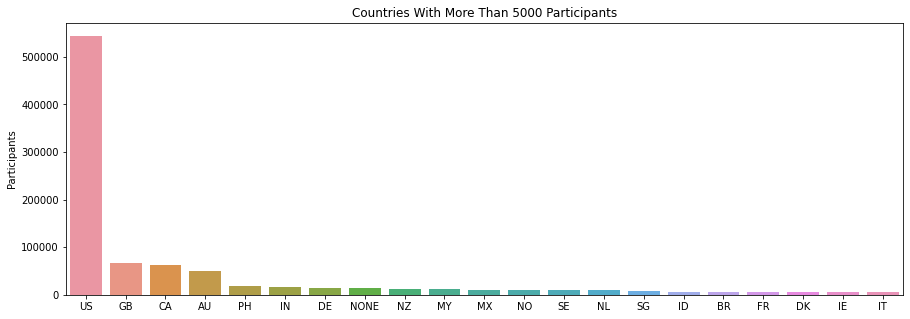

In [11]:
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [12]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [13]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

Q&As Related to Extroversion Personality


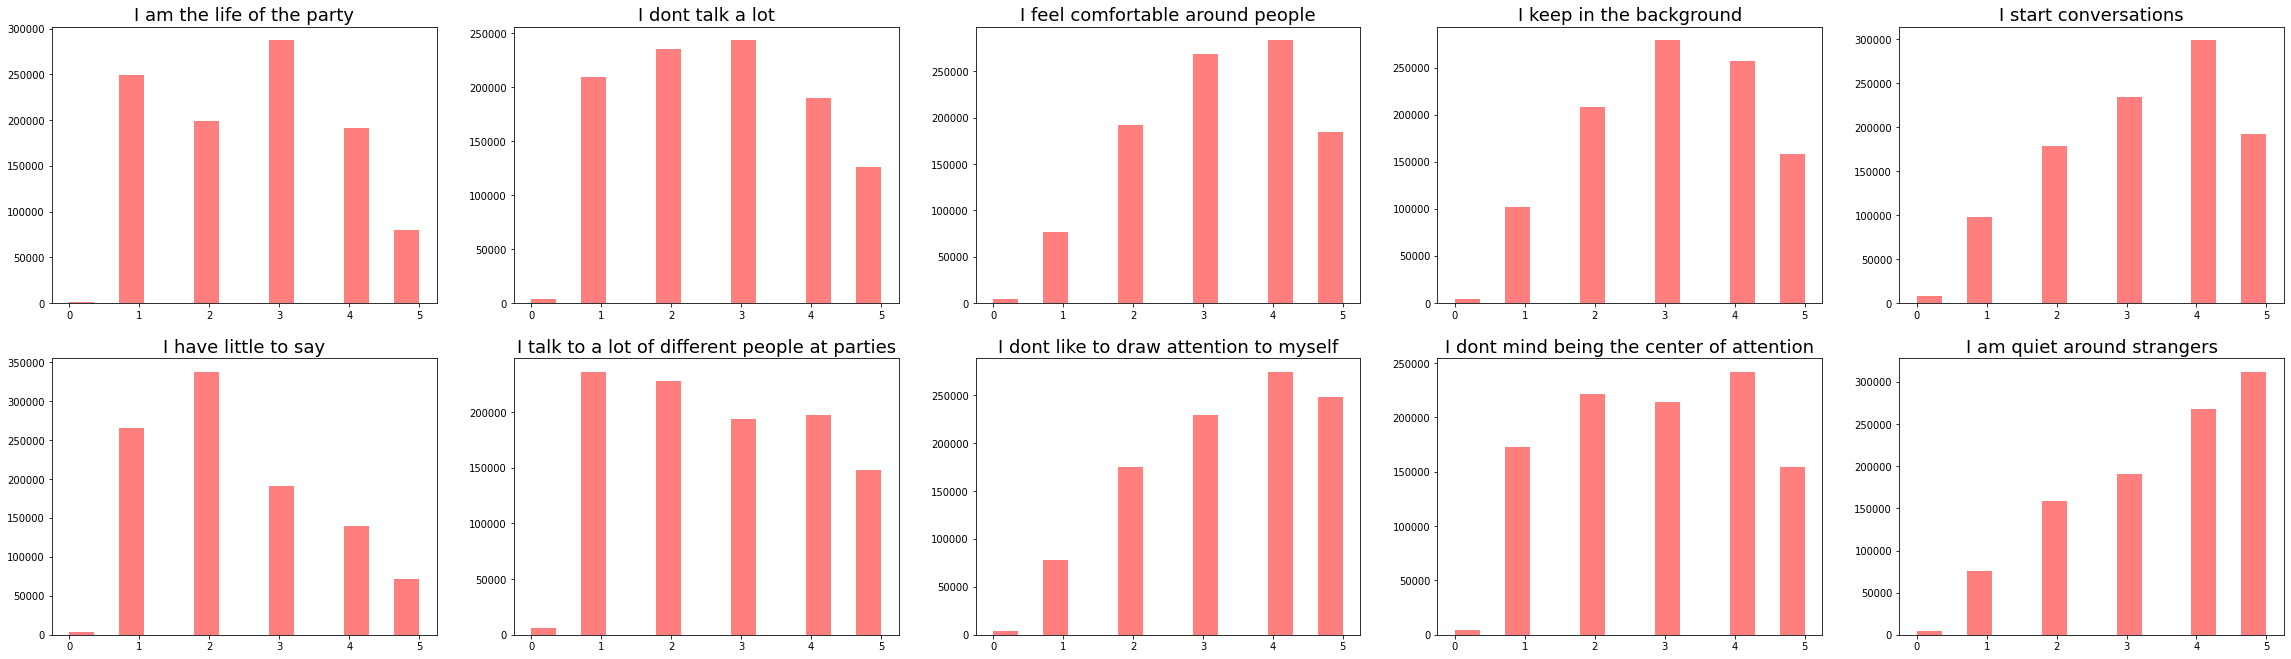

In [14]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'red')

Q&As Related to Neuroticism Personality


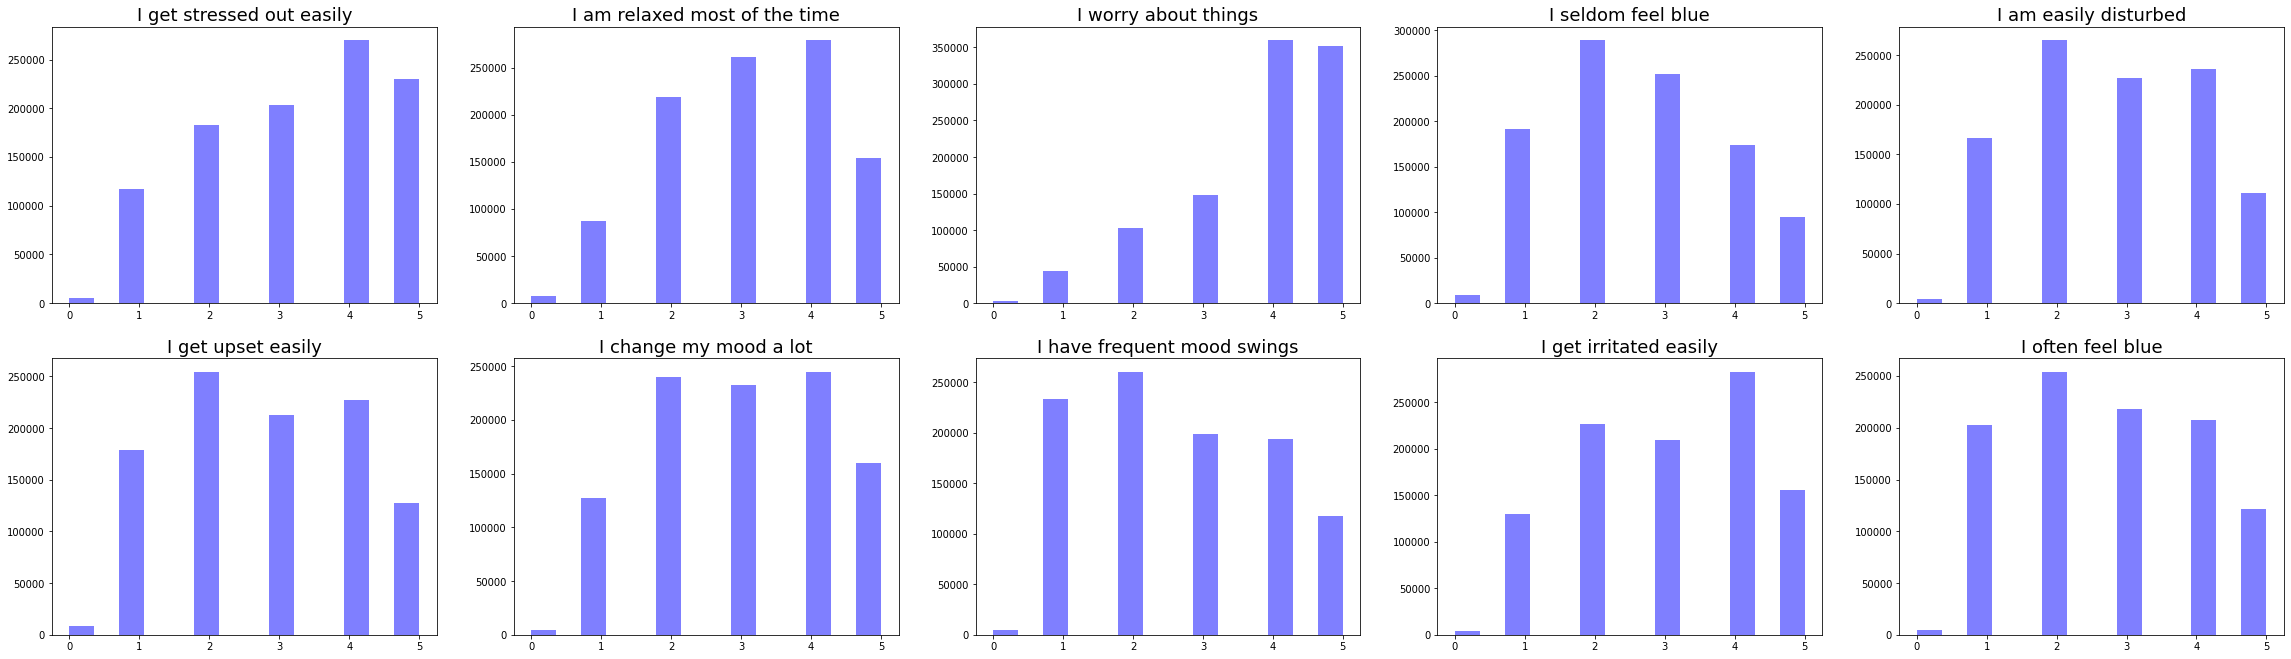

In [15]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'blue')

Q&As Related to Agreeable Personality


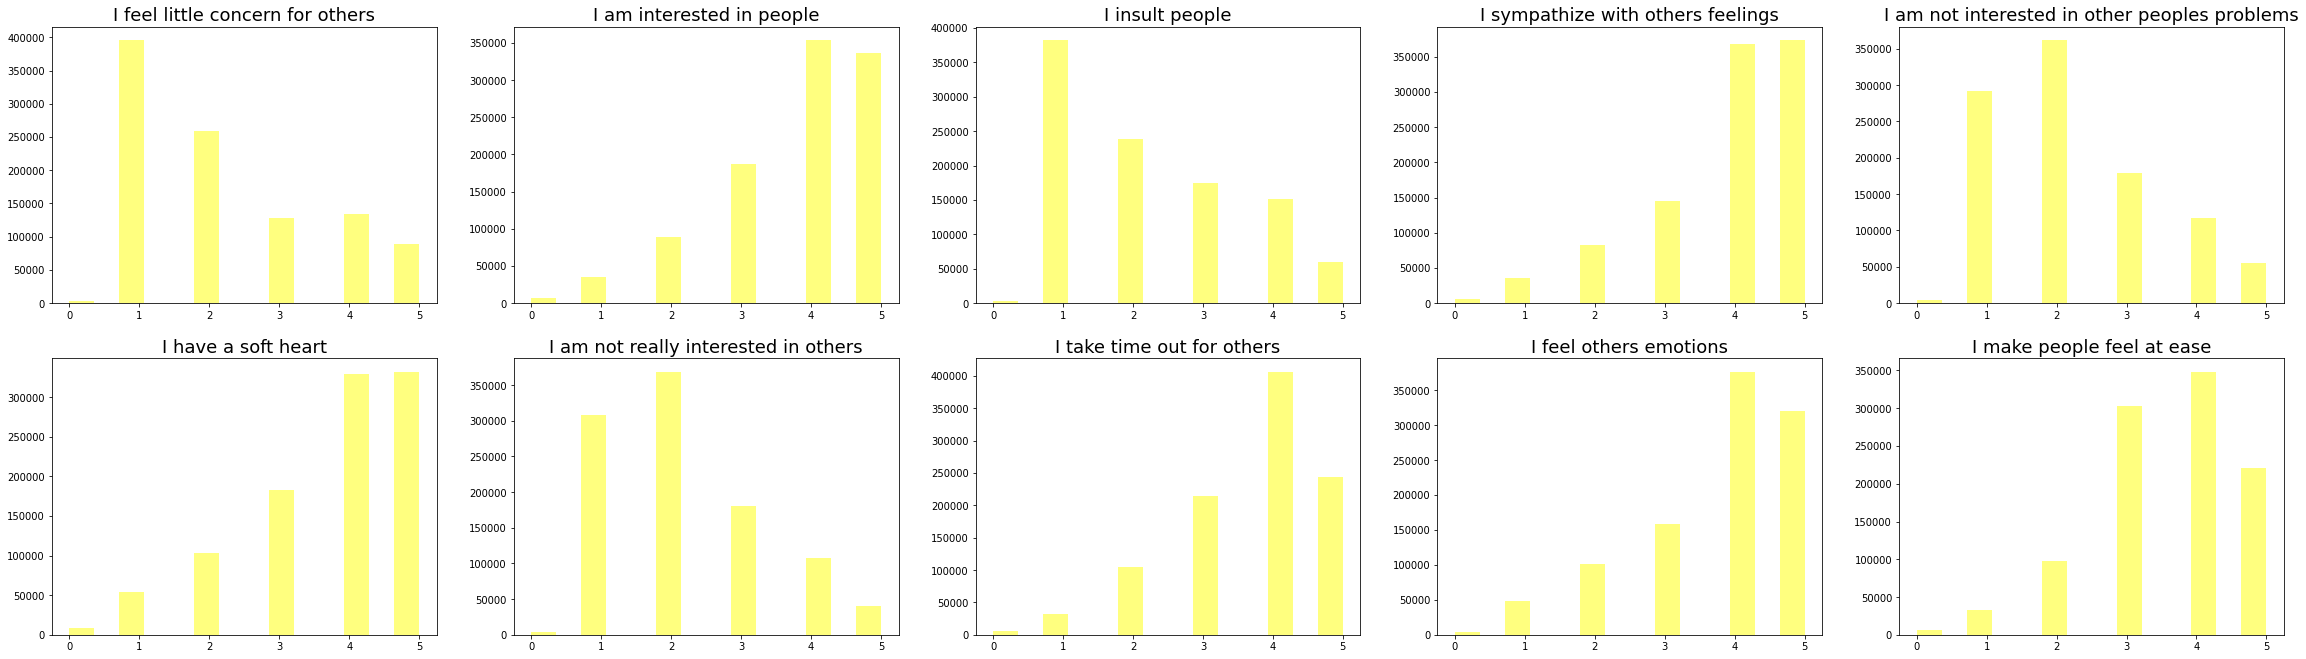

In [16]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'yellow')

Q&As Related to Conscientious Personality


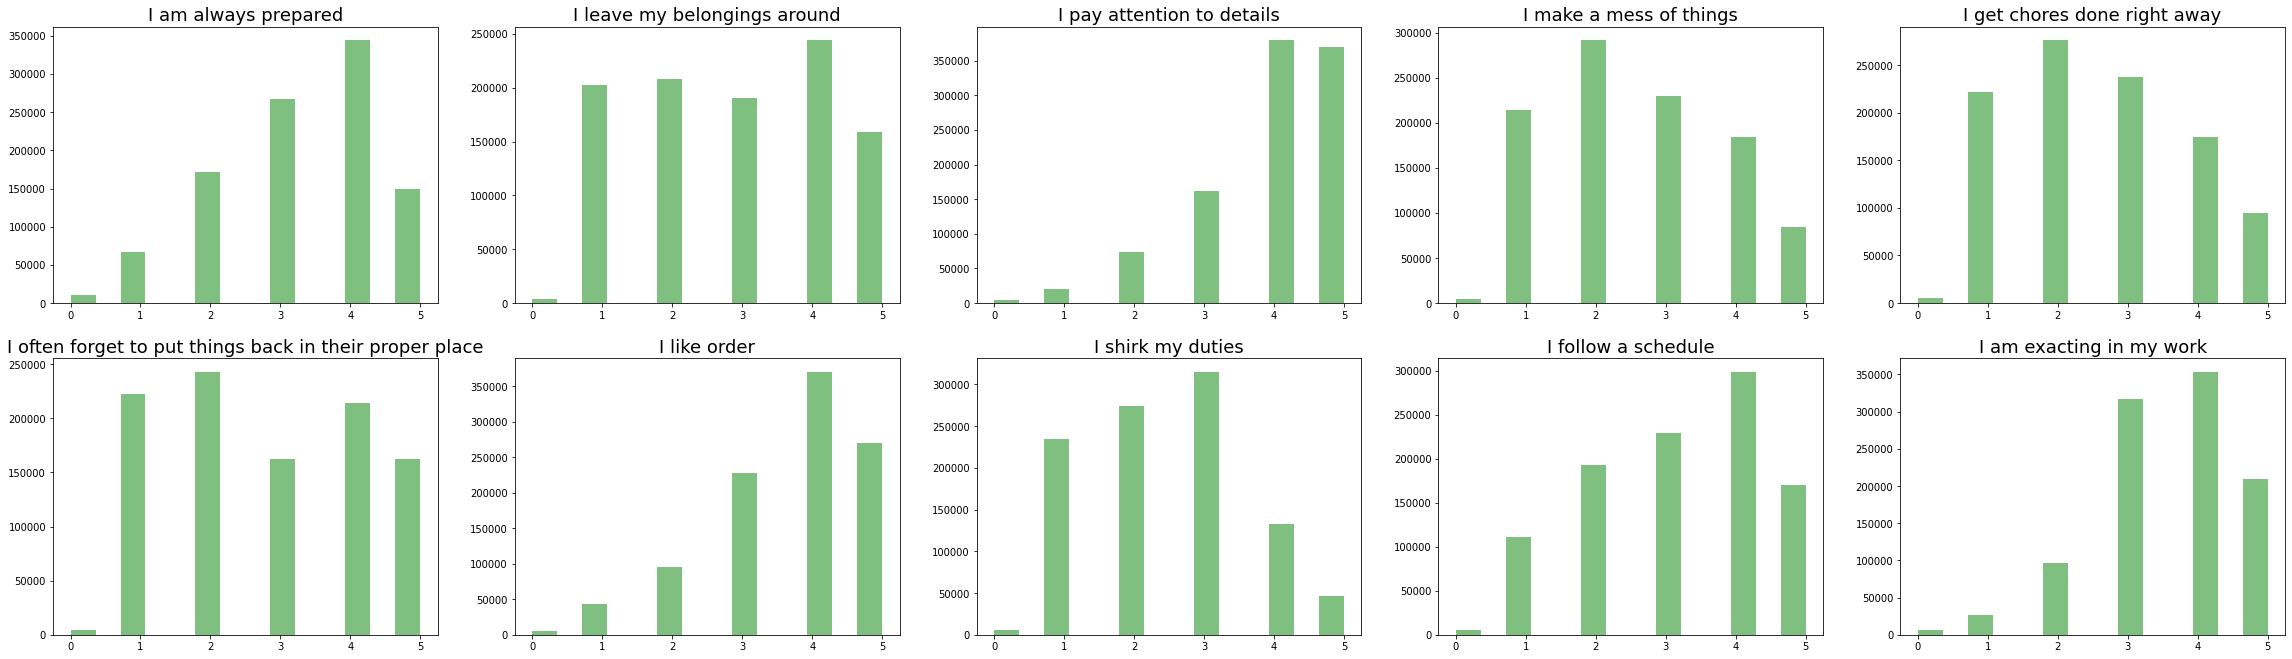

In [17]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'green')

Q&As Related to Open Personality


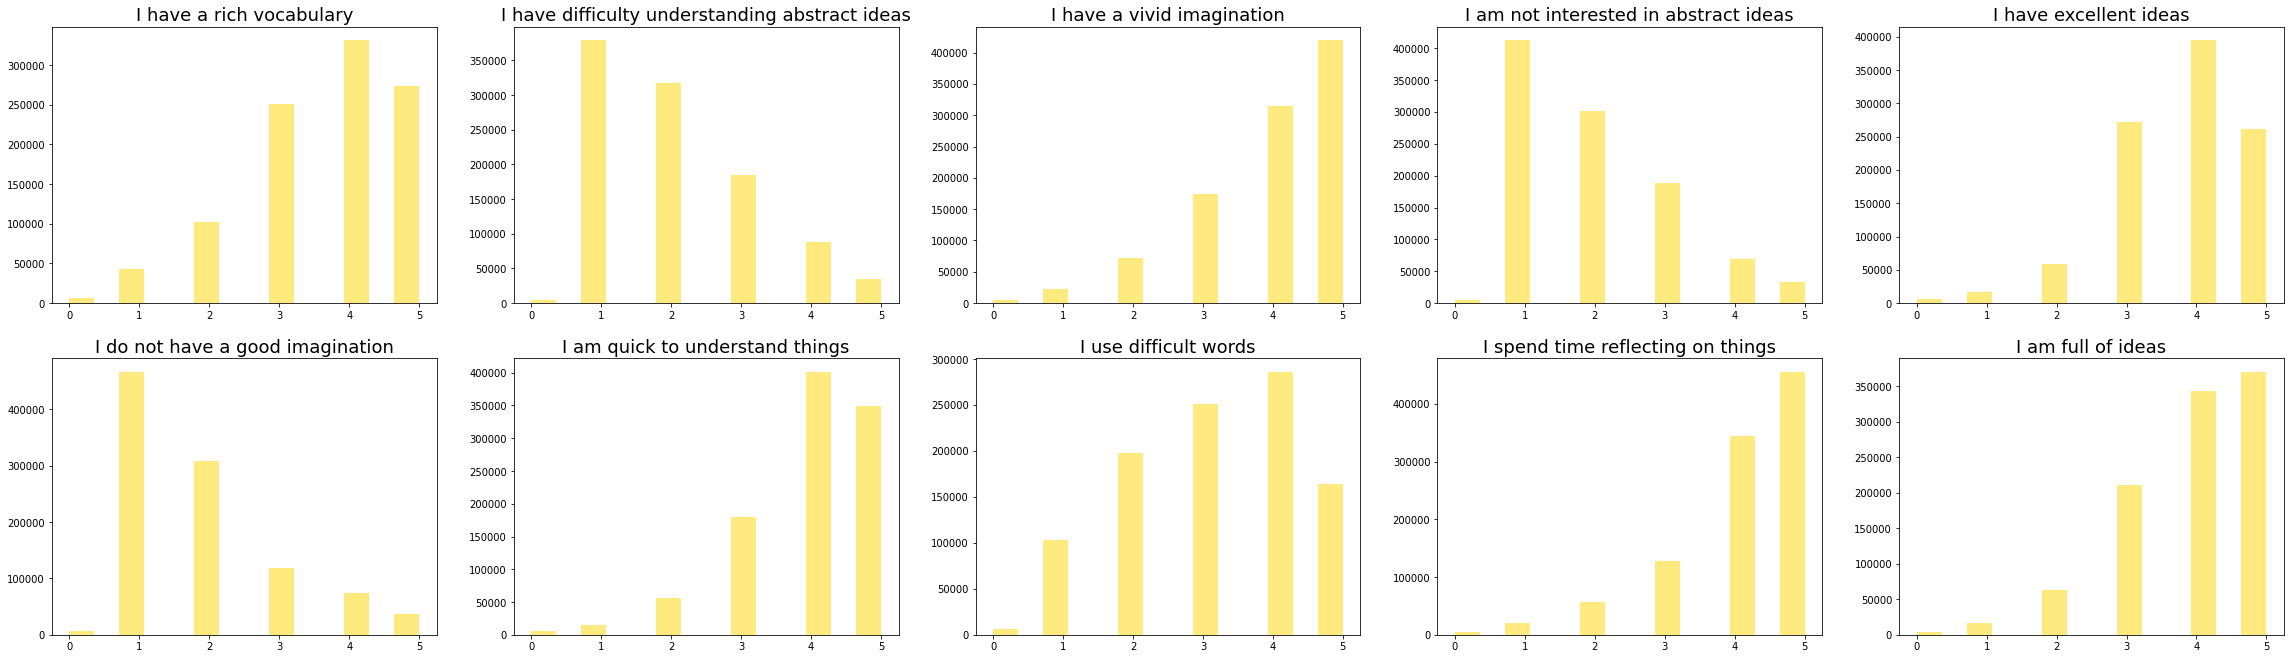

In [18]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'gold')

In [19]:
df1 = data.drop('country', axis=1)

In [20]:
df1.shape

(1009391, 50)

**PCA**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(df1)
X_scaled = scaler.transform(df1)

In [22]:
pca_2 = PCA(n_components = 5)
data_embeddings_pca_2 = pca_2.fit_transform(X_scaled)

**K Means**

In [23]:
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

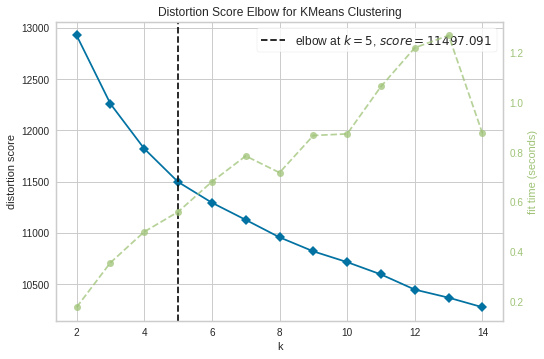

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [25]:
kme = KMeans(n_clusters=5).fit(df1)
kme.labels_

array([0, 1, 1, ..., 2, 1, 2], dtype=int32)

In [26]:
y_kmeans = km.fit_predict(df1)

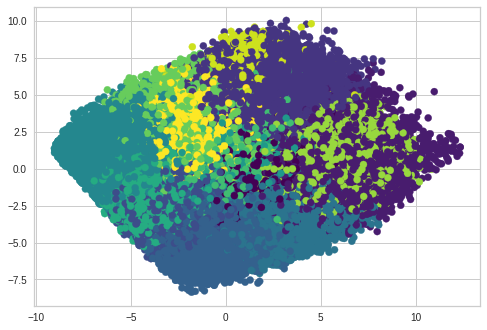

In [27]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=y_kmeans, s=50, cmap='viridis')

K Means-PyTorch

In [28]:
data_size, dims, num_clusters = 100000, 2, 5
x = torch.from_numpy(df1.to_numpy())

In [29]:
cluster_ids_x, cluster_centers = kmeans( X=x, num_clusters=5, distance='euclidean', device=torch.device('cuda:0') )

running k-means on cuda:0..


[running kmeans]: 63it [01:31,  1.45s/it, center_shift=0.000080, iteration=63, tol=0.000100]


In [30]:
cluster_ids_x

tensor([0, 1, 1,  ..., 3, 1, 3])

cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=5, distance='euclidean', device=torch.device('cuda:0')
)

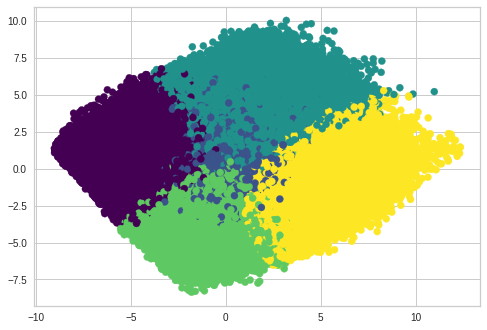

In [31]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=cluster_ids_x, s=50, cmap='viridis')

PCA for GMM

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(df_sample)
X_scaled = scaler.transform(df_sample)

In [33]:
pca_3 = PCA(n_components = 5)
data_embeddings_pca_3 = pca_3.fit_transform(X_scaled)

GMM

In [34]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(df_sample)
y_gmm = gmm.fit_predict(df_sample)
y_gmm

array([2, 1, 2, ..., 2, 0, 2])

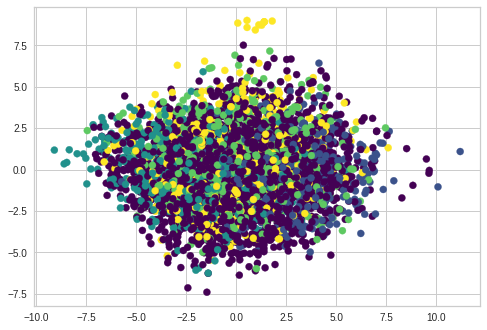

In [35]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_gmm, s=50, cmap='viridis')

K Means with 5k

In [36]:
mk = KMeans(n_clusters=5).fit(df_sample)
mk.labels_

array([4, 0, 0, ..., 4, 3, 4], dtype=int32)

In [37]:
mk.cluster_centers_

array([[0.40224719, 0.66610487, 0.62715356, 0.73726592, 0.58689139,
        0.53988764, 0.43520599, 0.81292135, 0.4428839 , 0.83464419,
        0.69494382, 0.62284644, 0.82378277, 0.53539326, 0.57640449,
        0.56816479, 0.56722846, 0.47265918, 0.59925094, 0.51853933,
        0.35749064, 0.79325843, 0.33089888, 0.86479401, 0.40262172,
        0.82453184, 0.39831461, 0.79531835, 0.82247191, 0.72883895,
        0.76161049, 0.44906367, 0.85149813, 0.39812734, 0.64719101,
        0.41835206, 0.83108614, 0.39456929, 0.76872659, 0.77228464,
        0.6988764 , 0.45730337, 0.75674157, 0.43764045, 0.71891386,
        0.40973783, 0.78614232, 0.56441948, 0.83614232, 0.72303371],
       [0.47619048, 0.63756614, 0.59417989, 0.66719577, 0.54550265,
        0.54973545, 0.45634921, 0.68518519, 0.57486772, 0.75185185,
        0.48095238, 0.7521164 , 0.5984127 , 0.61137566, 0.47857143,
        0.40132275, 0.47619048, 0.4026455 , 0.52169312, 0.4526455 ,
        0.61851852, 0.62354497, 0.54206349, 0.5

In [38]:
centers = np.array(mk.cluster_centers_)

In [39]:
y_mk = km.fit_predict(df_sample)

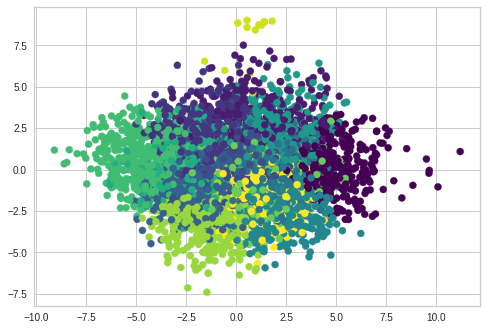

In [40]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_mk, s=50, cmap='viridis')

Cluster GMM with DBSCAM

In [41]:
from sklearn.mixture import GaussianMixture
gmm1 = GaussianMixture(n_components=5).fit(df_sample)
y_gmm1 = gmm1.fit_predict(df_sample)
y_gmm1

array([2, 1, 2, ..., 2, 3, 2])

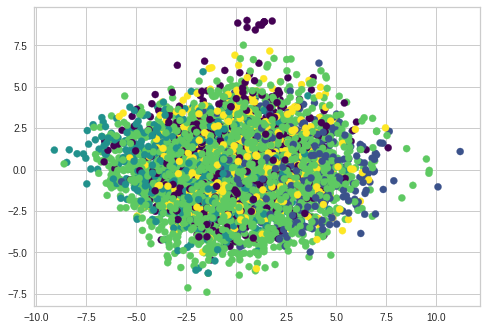

In [42]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_gmm1, s=50, cmap='viridis')

BIRCH

In [43]:
from sklearn.cluster import Birch

In [44]:
bir = Birch(n_clusters=5).fit(df_sample)
bir.labels_

array([0, 4, 4, ..., 0, 2, 0])

In [45]:
y_bir = bir.fit_predict(df_sample)
y_bir

array([0, 4, 4, ..., 0, 2, 0])

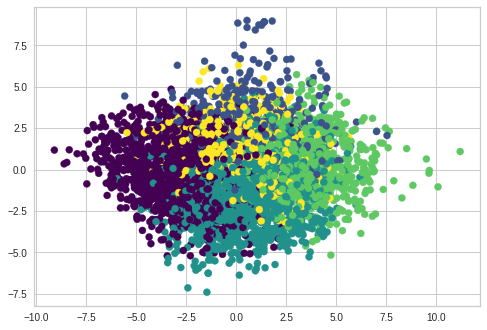

In [46]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_bir, s=50, cmap='viridis')

Comparing K-means, GMM and Birch

1) The Gausian Mixture is more robust, but seems to be slower than K-Means and Birch as it takes more iterations to the EM algorithm to reach convergence.

2) The GM sometimes converge to a local minima which is not a optimal solution

3) The time required for Birch in this example is the least following by K-Means and lastly GMM.

4) If we use a GMM followed by K-Means the results become better exponentially.

References

https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means

https://www.kernel-operations.io/keops/_auto_tutorials/kmeans/plot_kmeans_torch.html